In [16]:
##importing required libraries
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [17]:
#import the required data
data=pd.read_csv("Real_Estate.csv")
data

,Transaction date,House age,Distance to the nearest MRT station,Number of convenience stores,Latitude,Longitude,House price of unit area
0,2012-09-02 16:42:30.519336,13.3,4082.01500,8,25.007059,121.561694,6.488673
1,2012-09-04 22:52:29.919544,35.5,274.01440,2,25.012148,121.546990,24.970725
2,2012-09-05 01:10:52.349449,1.1,1978.67100,10,25.003850,121.528336,26.694267
3,2012-09-05 13:26:01.189083,22.2,1055.06700,5,24.962887,121.482178,38.091638
4,2012-09-06 08:29:47.910523,8.5,967.40000,6,25.011037,121.479946,21.654710
...,...,...,...,...,...,...,...
409,2013-07-25 15:30:36.565239,18.3,170.12890,6,24.981186,121.486798,29.096310
410,2013-07-26 17:16:34.019780,11.9,323.69120,2,24.950070,121.483918,33.871347
411,2013-07-28 21:47:23.339050,0.0,451.64190,8,24.963901,121.543387,25.255105
412,2013-07-29 13:33:29.405317,35.9,292.99780,5,24.997863,121.558286,25.285620


In [18]:
## it gives information about data like datatype,non null values in each colum ,total columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 7 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Transaction date                     414 non-null    object 
 1   House age                            414 non-null    float64
 2   Distance to the nearest MRT station  414 non-null    float64
 3   Number of convenience stores         414 non-null    int64  
 4   Latitude                             414 non-null    float64
 5   Longitude                            414 non-null    float64
 6   House price of unit area             414 non-null    float64
dtypes: float64(5), int64(1), object(1)
memory usage: 22.8+ KB


In [19]:
#check null values in each colum of data
data.isnull().sum()

Transaction date                       0
House age                              0
Distance to the nearest MRT station    0
Number of convenience stores           0
Latitude                               0
Longitude                              0
House price of unit area               0
dtype: int64

In [20]:
data.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
409    False
410    False
411    False
412    False
413    False
Length: 414, dtype: bool

###### `there is no duplicate data present in the data

In [21]:
# it gives statistical information about each colum of data
data.describe()

,House age,Distance to the nearest MRT station,Number of convenience stores,Latitude,Longitude,House price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,18.405072,1064.468233,4.265700,24.973605,121.520268,29.102149
std,11.757670,1196.749385,2.880498,0.024178,0.026989,15.750935
min,0.000000,23.382840,0.000000,24.932075,121.473888,0.000000
25%,9.900000,289.324800,2.000000,24.952422,121.496866,18.422493
50%,16.450000,506.114400,5.000000,24.974353,121.520912,30.394070
75%,30.375000,1454.279000,6.750000,24.994947,121.544676,40.615184
max,42.700000,6306.153000,10.000000,25.014578,121.565321,65.571716


In [22]:
#convert string datatype of transaction date column into date 
data['Transaction date'] = pd.to_datetime(data['Transaction date'])
data['Transaction year'] = data['Transaction date'].dt.year
data['Transaction month'] = data['Transaction date'].dt.month

In [23]:
# drop the original "Transaction date" as we've extracted relevant features
data = data.drop(columns=['Transaction date'])

In [24]:
data.head()

,House age,Distance to the nearest MRT station,Number of convenience stores,Latitude,Longitude,House price of unit area,Transaction year,Transaction month
0,13.3,4082.0150,8,25.007059,121.561694,6.488673,2012,9
1,35.5,274.0144,2,25.012148,121.546990,24.970725,2012,9
2,1.1,1978.6710,10,25.003850,121.528336,26.694267,2012,9
3,22.2,1055.0670,5,24.962887,121.482178,38.091638,2012,9
4,8.5,967.4000,6,25.011037,121.479946,21.654710,2012,9


In [25]:
correlation_matrix=data.corr()
correlation_matrix

,House age,Distance to the nearest MRT station,Number of convenience stores,Latitude,Longitude,House price of unit area,Transaction year,Transaction month
House age,1.000000,0.021596,0.021973,0.114345,0.036449,-0.012284,-0.025535,0.018921
Distance to the nearest MRT station,0.021596,1.000000,0.069015,0.038954,0.064229,-0.636579,-0.017002,0.027954
Number of convenience stores,0.021973,0.069015,1.000000,0.082725,0.013156,0.280763,-0.096270,0.081461
Latitude,0.114345,0.038954,0.082725,1.000000,0.007754,0.081008,0.024791,-0.050891
Longitude,0.036449,0.064229,0.013156,0.007754,1.000000,-0.098626,0.086737,-0.057595
House price of unit area,-0.012284,-0.636579,0.280763,0.081008,-0.098626,1.000000,0.015745,-0.041256
Transaction year,-0.025535,-0.017002,-0.096270,0.024791,0.086737,0.015745,1.000000,-0.873938
Transaction month,0.018921,0.027954,0.081461,-0.050891,-0.057595,-0.041256,-0.873938,1.000000


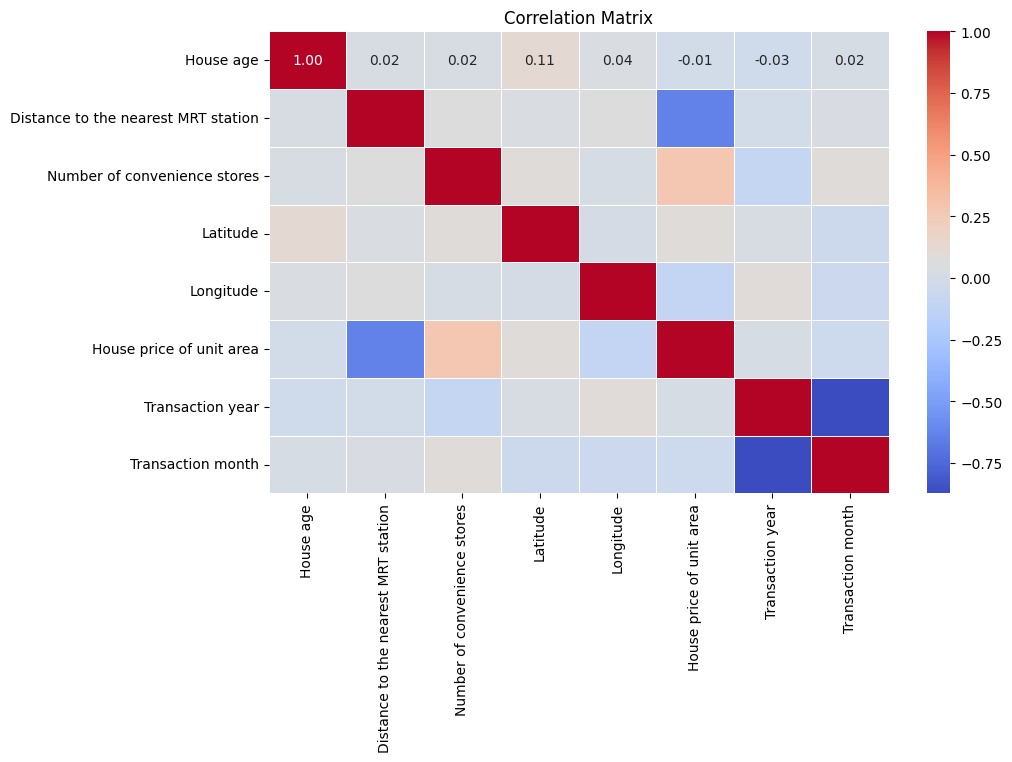

                                     House age  \
House age                             1.000000   
Distance to the nearest MRT station   0.021596   
Number of convenience stores          0.021973   
Latitude                              0.114345   
Longitude                             0.036449   
House price of unit area             -0.012284   
Transaction year                     -0.025535   
Transaction month                     0.018921   

                                     Distance to the nearest MRT station  \
House age                                                       0.021596   
Distance to the nearest MRT station                             1.000000   
Number of convenience stores                                    0.069015   
Latitude                                                        0.038954   
Longitude                                                       0.064229   
House price of unit area                                       -0.636579   
Transaction year 

In [26]:
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

print(correlation_matrix)

#### The correlation matrix provides quantified insights into how each variable is related to the others, especially with respect to the house price:

House Age: This shows a very weak negative correlation with house price (-0.012), implying that age is not a strong predictor of price in this dataset.
    
Distance to Nearest MRT Station: Has a strong negative correlation with house price (-0.637). It indicates that properties closer to MRT stations tend to have higher prices, 
which is a significant factor in property valuation.

Number of Convenience Stores: Displays a moderate positive correlation with house price (0.281). More convenience stores in the vicinity seem to positively affect property prices.
    
Latitude and Longitude: Both show a weak correlation with house prices. Latitude has a slight positive correlation (0.081), while longitude has a slight negative correlation (-0.099).

Overall, the most significant factors affecting house prices in this dataset appear to be the proximity to MRT stations and the number of convenience stores nearby. The geographical location (latitude and longitude) and the age of the house seem to have less impact on the price.



C:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and w

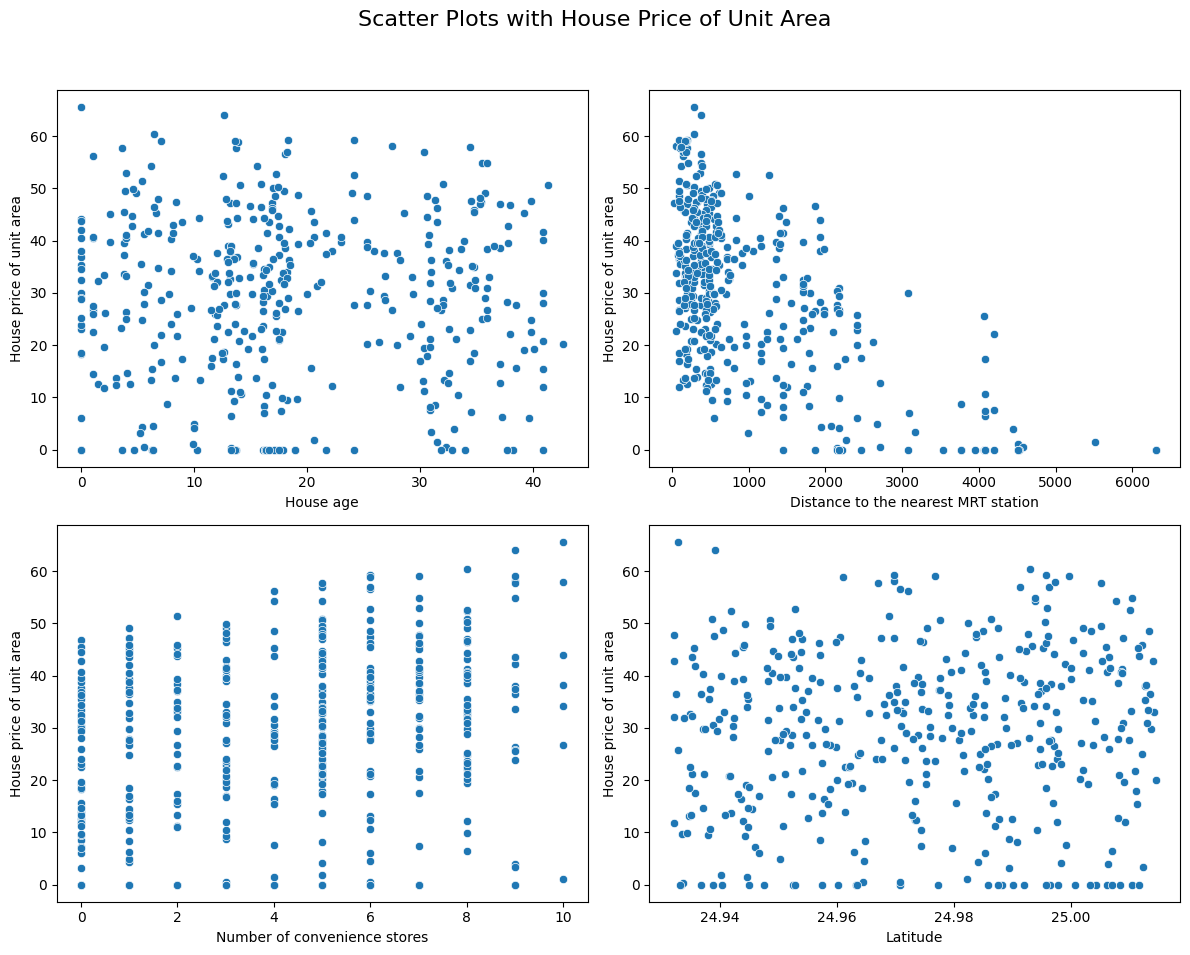

In [27]:
# Scatter plots to observe the relationship with house price
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))
fig.suptitle('Scatter Plots with House Price of Unit Area', fontsize=16)

# Scatter plot for each variable against the house price
sns.scatterplot(data=data, x='House age', y='House price of unit area', ax=axes[0, 0])
sns.scatterplot(data=data, x='Distance to the nearest MRT station', y='House price of unit area', ax=axes[0, 1])
sns.scatterplot(data=data, x='Number of convenience stores', y='House price of unit area', ax=axes[1, 0])
sns.scatterplot(data=data, x='Latitude', y='House price of unit area', ax=axes[1, 1])

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

### The scatter plots revealed interesting relationships between various factors and house prices:

House Age vs. House Price: There doesn’t seem to be a strong linear relationship between house age and price. However,
it appears that very new and very old houses might have higher prices.

Distance to the Nearest MRT Station vs. House Price: There is a clear trend showing that as the distance to the nearest MRT station increases,
the house price tends to decrease.It suggests a strong negative relationship between these two variables.

Number of Convenience Stores vs. House Price: There seems to be a positive relationship between the number of convenience stores and house prices.
Houses with more convenience stores in the vicinity tend to have higher prices.

Latitude vs. House Price: While not a strong linear relationship, there seems to be a pattern where certain latitudes correspond to higher or
lower house prices. It could be indicative of specific neighbourhoods being more desirable.

In [28]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

#fit_transform(X_train): This method computes the mean and standard deviation of the training data (X_train) and then uses these statistics to scale 
##the training data. The result, X_train_scaled, is a standardized version of X_train, where each feature will have a mean of 0 and a standard deviation of 1.
X_train_scaled = scaler.fit_transform(X_train)

#transform(X_test): This method scales the test data (X_test) using the mean and standard deviation calculated from the training data.
X_test_scaled = scaler.transform(X_test)


In [29]:
 #Selecting features and target variable
features = ['Distance to the nearest MRT station', 'Number of convenience stores', 'Latitude', 'Longitude']
target = ['House price of unit area']

X =data[features]
y = data[target]

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model initialization
model = LinearRegression()

# Training the model
model.fit(X_train_scaled, y_train)

LinearRegression()

In [30]:
X_test

,Distance to the nearest MRT station,Number of convenience stores,Latitude,Longitude
358,431.1114,7,24.988810,121.562201
350,1360.1390,8,24.953801,121.565321
373,250.6310,1,25.008034,121.556559
399,208.3905,9,25.010412,121.565027
369,1414.8370,2,25.000031,121.529006
...,...,...,...,...
31,1828.3190,4,24.997065,121.512329
283,815.9314,0,24.980314,121.476566
157,3171.3290,9,25.012370,121.545902
203,4197.3490,7,25.004411,121.561228


In [31]:
y_test

,House price of unit area
358,35.762667
350,31.743662
373,27.786894
399,54.831664
369,39.416482
...,...
31,15.564324
283,15.593247
157,3.398305
203,0.000000


In [32]:
pred=model.predict(X_test_scaled)
pred

array([[38.58553308],
       [30.27545642],
       [30.63507225],
       [45.36862646],
       [23.20924222],
       [32.62839508],
       [18.86501864],
       [29.94261815],
       [34.07952742],
       [ 5.89497833],
       [32.85732428],
       [39.20080259],
       [ 9.53933735],
       [26.59244074],
       [36.4493457 ],
       [30.28723911],
       [28.04489627],
       [25.25342026],
       [32.27376753],
       [35.64440194],
       [40.13217328],
       [43.49105768],
       [24.99527978],
       [26.25085055],
       [17.96310001],
       [35.10917253],
       [ 6.82443074],
       [32.53546274],
       [44.00560347],
       [32.58080109],
       [35.41056515],
       [41.43623239],
       [46.47938892],
       [47.35823696],
       [30.94654249],
       [29.06540547],
       [10.44054345],
       [41.18164338],
       [40.63191112],
       [36.76567644],
       [40.89561923],
       [36.21231597],
       [11.10702158],
       [-0.14343553],
       [35.9538785 ],
       [25

In [38]:
model.score(X_test_scaled,y_test)

0.5496730640945564

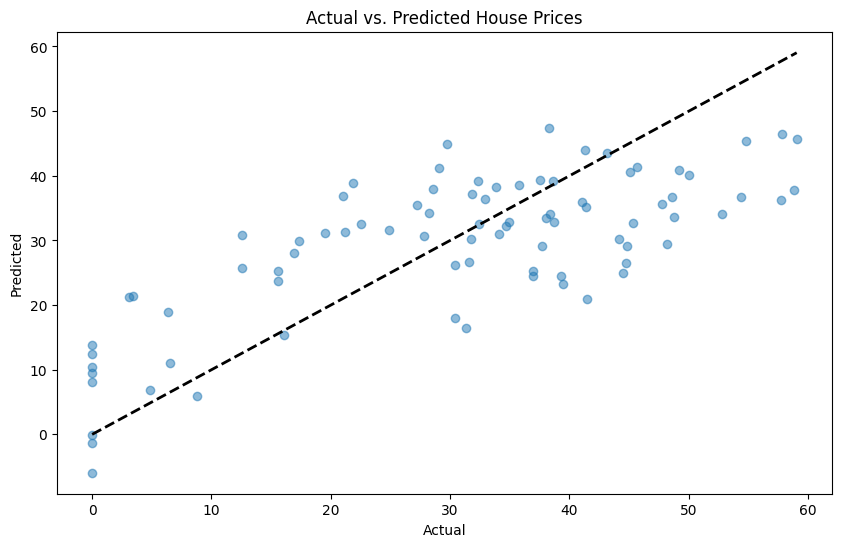

In [39]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted House Prices')
plt.show()

#### The diagonal dashed line represents where the actual and predicted values would be equal. Points close to this line indicate accurate predictions. From the plot, we can observe:

Many points are close to the diagonal line, suggesting that the model makes reasonably accurate predictions for a significant portion of the test set.
Some points are further from the line, indicating areas where the model’s predictions deviate more significantly from the actual values.

In [40]:
from sklearn.metrics import mean_absolute_error, r2_score
mae = mean_absolute_error(y_test, pred)
print("mae",mae)
r2 = r2_score(y_test, pred)
r2



mae 9.518038948835441


0.5496730640945564

In [42]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42)
}

# dictionary to hold the evaluation metrics for each model
results = {}

# train and evaluate each model
for name, model in models.items():
    # training the model
    model.fit(X_train_scaled, y_train)

    # making predictions on the test set
    predictions = model.predict(X_test_scaled)

    # calculating evaluation metrics
    mae = mean_absolute_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)

    # storing the metrics
    results[name] = {"MAE": mae, "R²": r2}

results_df = pd.DataFrame(results).T  # convert the results to a DataFrame for better readability
print(results_df)

C:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


                         MAE        R²
Linear Regression   9.518039  0.549673
Decision Tree      13.044347  0.006758
Random Forest       9.703094  0.516634
Gradient Boosting  10.066466  0.466320


C:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


### Linear Regression has the lowest MAE (9.75) and the highest R² (0.53), making it the best-performing model among those evaluated. It suggests that, despite its simplicity, Linear Regression is quite effective for this dataset.